<a href="https://colab.research.google.com/github/near731/Sziltan/blob/main/szilhf1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Szilárdságtan HF1 megoldó

1.feladatrész: 

Ax= 4 kN
Bz= 1.67840909090909 kN
Az= 0.796590909090909 kN
B= 1.67840909090909 kN
A= 4.07854840310205 kN

2.feladatrész: 

NGz= -0.688223140495868 kN
N3Cz= 0.990185950413223 kN
NGx=NBx=NBz= -0.688223140495868 kN
N3Cx= -0.311776859504132 kN
N3Bx= -0.688223140495868 kN
N3Bz= 0.990185950413223 kN

3.feladatrész: 

Igénybevételi függvények:

Piecewise((-4, x <= 0.3), (-4.68822314049587, x <= 0.55), (-1.68822314049587, x <= 0.85))
Piecewise((0.796590909090909, x <= 0.3), (-4.5*x + 1.45836776859504, x <= 0.85))
Piecewise((-0.796590909090909*x, x <= 0.3), (-1.48481404958678*x + 2.25*(x - 0.3)**2 + 0.20646694214876, x <= 0.55), (-1.48481404958678*x + 2.25*(x - 0.3)**2 + 0.58146694214876, x <= 0.85))

Igénybevételi ábrák:



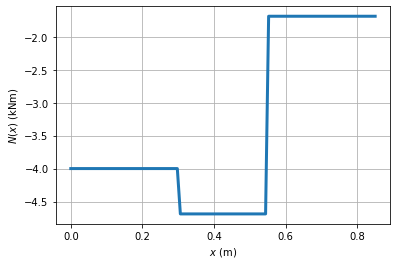

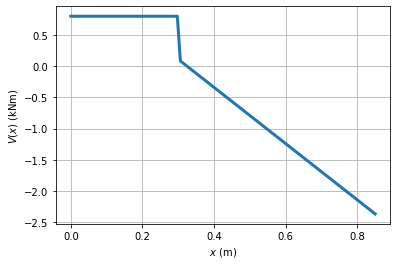

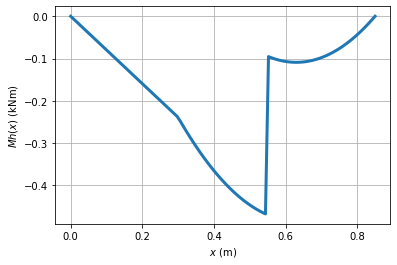


4.feladatrész: 

Mhmax= 0.757045454545454 kNm
Kymin= 757.045454545454 mm4
b= 11.6469385967378 mm


In [32]:
import numpy as np
import sympy as sp

print("Szilárdságtan HF1 megoldó\n")

R,L,d,c,F1,F2,p,szigma_meg=sp.symbols("R,L,d,c,F1,F2,p,szigma_meg")

#ADATOK

R_adat=0.25 #m
L_adat=0.3 #m
d_adat=50 #mm
c_adat=36 #mm
F1_adat=3 #kN
F2_adat=1 #kN
p_adat=4.5 #Kn/m
szigma_meg_adat=100 #MPa

adatok= [(R,R_adat),(L,L_adat),(d,d_adat),(c,c_adat),(F1,F1_adat),(F2,F2_adat),(p,p_adat),(szigma_meg,szigma_meg_adat)]

#REAKCIÓERŐK SZÁMITÁSA (BIZTOS JÓ)

print("1.feladatrész: \n")

Ax=F1+F2
Axn=Ax.subs(adatok)
print("Ax=",Axn,"kN")

Bz=(1/(R+L))*(p*(R+L)*(L+((R+L)/2))-F1*(R/2)-F2*(R/2))
Bzn=Bz.subs(adatok)
print("Bz=",Bzn,"kN")

Az=p*(R+L)-Bz
Azn=Az.subs(adatok)
print("Az=",Azn,"kN")

B=Bzn
print("B=",B,"kN")
A=(Ax**2+Az**2)**(1/2)
An=A.subs(adatok)
print("A=",An,"kN")

#NBx=NBz=NGx=NGz

#NGz=Az+NCz-p*(R+L)
#NGx=Ax-F1+NCx

#VALAMI FÉLRE SZÁMOLÁS VAN ITT

print("\n2.feladatrész: \n")

NGz=(1/(-L-R))*(F1*(R/2)-p*(L+R)*(L+(L+R)/2)+(2*L+R)*(p*(L+R)-Az))
NGzn=NGz.subs(adatok)
print("NGz=",NGzn,"kN") #JÓ

N3Cz=NGz+p*(L+R)-Az
N3Czn=N3Cz.subs(adatok)
print("N3Cz=",N3Czn,"kN") #JÓ

NGx=NGzn
NBx=NGx
NBz=NGx
print("NGx=NBx=NBz=",NGx,"kN")

N3Cx=F1-NGz-Ax
N3Cxn=N3Cx.subs(adatok)
print("N3Cx=",N3Cxn,"kN")

N3Bx=-F2-N3Cx
N3Bxn=N3Bx.subs(adatok)
print("N3Bx=",N3Bxn,"kN")

N3Bz=N3Cz
N3Bzn=N3Bz.subs(adatok)
print("N3Bz=",N3Bzn,"kN")

#IGÉNYBEVÉTELI FÜGGVÉNYEK

print("\n3.feladatrész: \n")
print("Igénybevételi függvények:\n")

x=sp.symbols("x")

N=sp.Piecewise((-Ax, x<=L), (-Ax+NGx, x<=L+R), (-Ax+NGx+F1, x<=2*L+R))
V=sp.Piecewise((Az,x<=L),(Az+NGz-p*(x-L),x<=2*L+R))
Mh=sp.Piecewise((-Az*x, x<=L), (-Az*x+NGz*(x-L)+p*((x-L)**2)/2, x<=R+L),(F1*(R/2)-Az*x+NGz*(x-L)+p*((x-L)**2)/2, x<=2*L+R))

Nn=N.subs(adatok)
Vn=V.subs(adatok)
Mhn=Mh.subs(adatok)

print(Nn)
print(Vn)
print(Mhn)

#IGÉNYBEVÉTELI ÁBRÁK

import matplotlib.pyplot as plt
from numpy import linspace

print("\nIgénybevételi ábrák:\n")

L0=(2*L+R).subs(adatok)
xs=linspace(0.,float(L0),101)
    

Nxs=[Nn.subs(x,xi) for xi in xs]
Vxs=[Vn.subs(x,xi) for xi in xs]
Mhxs=[Mhn.subs(x,xi) for xi in xs]

plt.plot(xs, Nxs, lw=3)
plt.xlabel("$x$ (m)")
plt.ylabel("$N(x)$ (kNm)")
plt.grid()
plt.show()


plt.plot(xs, Vxs, lw=3)
plt.xlabel("$x$ (m)")
plt.ylabel("$V(x)$ (kNm)")
plt.grid()
plt.show()

plt.plot(xs, Mhxs, lw=3)
plt.xlabel("$x$ (m)")
plt.ylabel("$Mh(x)$ (kNm)")
plt.grid()
plt.show()

#VESZÉLYES KERESZTMETSZET Mhmax, KERESZTMETSZETI TÉNYEZŐ MEGADÁSA

print("\n4.feladatrész: \n")

#t=0.55
Mhmax=(F1*(R/2)-Az*(R+2*L)-NGz*(R+L)+p*((R+L)*(R+L))/2)
Mhmaxn=Mhmax.subs(adatok)

print("Mhmax=",Mhmaxn,"kNm")

Ky=(abs(Mhmax)/(1000*szigma_meg))*10**8
Kyn=Ky.subs(adatok)
print("Kymin=",Kyn,"mm4")

b=(48/23*Ky)**(1/3)
bn=b.subs(adatok)
print("b=",bn,"mm")

#Iy=(b*(2*b)**3)/12-((2*b-b/2)**3*(b-b/3))/12
#Iyn=Iy.subs(adatok)

#print("Iy=",Iyn,"mm4")
